Opencv provides two transformation functions - cv2.warpAffine and cv2.warpPerspective - with both u can perform all kind of transformations.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def show_img(img, title='Transformed Image'):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

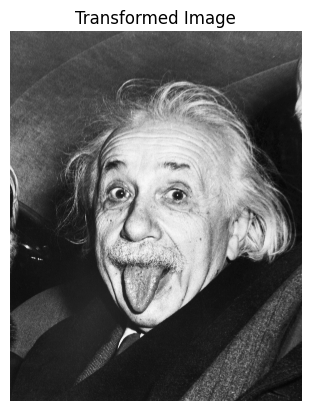

In [6]:
img = cv2.imread('./assets/albert.jpg')

resize = cv2.resize(src=img, dsize=None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
show_img(resize)

Translation - shifting location operation, we create a transformation matrix: 
$$
M = 
\begin{bmatrix}
1 & 0 & t_{x} \\
0 & 1 & t_{y}
\end{bmatrix}
$$


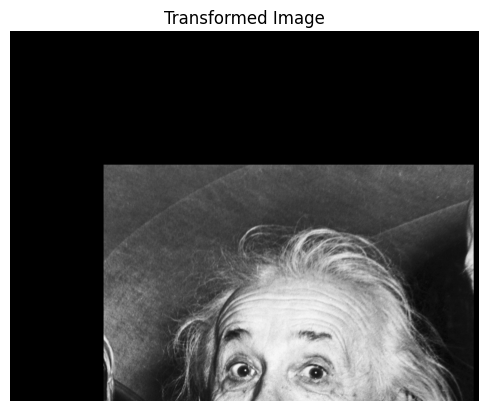

In [9]:
r, c, d = img.shape
M = np.array([[1, 0, 700], [0, 1, 1000]], dtype=np.float32)
dst = cv2.warpAffine(src=img, M=M, dsize=(r, c))

show_img(dst)

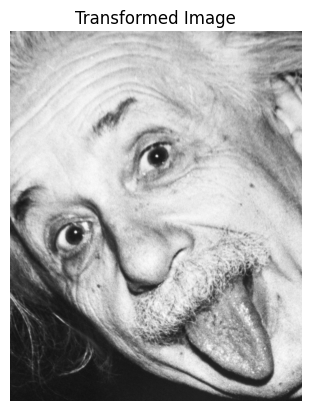

In [10]:
rows,cols,ch = img.shape
 
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,2)
dst = cv2.warpAffine(img,M,(cols,rows))

show_img(dst)

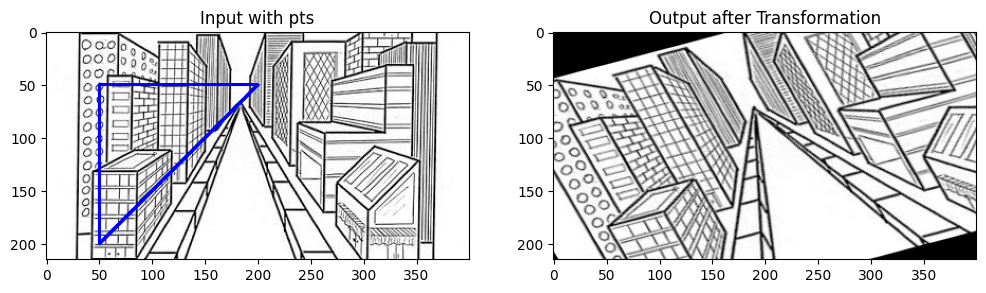

In [12]:
image = cv2.imread('./assets/ORTHO.jpg')
assert image is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = image.shape
 
pts_original = np.float32([[50,50],[200,50],[50,200]])
# pts_original contains three points from the input image that you want to transform.

pts_transformed = np.float32([[10,100],[200,50],[100,250]])
# pts_transformed contains the new locations of the points after the transformation.

M = cv2.getAffineTransform(pts_original,pts_transformed)
# function computes a 2x3 affine transformation matrix, M, 
# which describes how to transform the three points in pts_original to their corresponding points in pts_transformed.

dst = cv2.warpAffine(image,M,(cols,rows))
plt.figure(figsize=(12, 6)) 

# Draw pts1 points as a blue rectangle on the original image
image_with_rectangle = image.copy()
cv2.polylines(image_with_rectangle, [np.int32(pts_original)], isClosed=True, color=(255, 0, 0), thickness=2)


plt.subplot(121), plt.imshow(cv2.cvtColor(image_with_rectangle, cv2.COLOR_BGR2RGB)), plt.title('Input with pts')
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Output after Transformation')
plt.show()

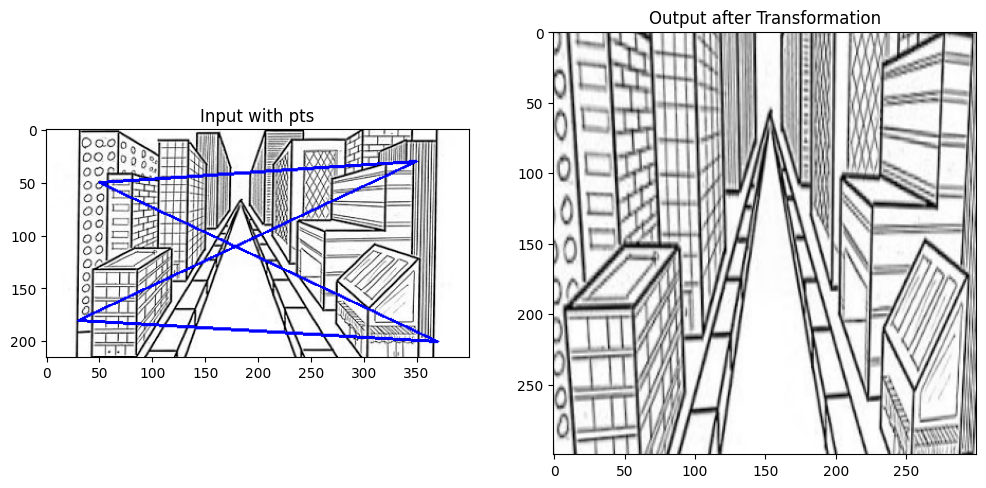

In [13]:
pts_original = np.float32([[50, 50], [350, 30], [30, 180], [370, 200]]) 
# This is a set of four points in the original image (image) that represent a quadrilateral region that we want to transform. 
# These points are typically chosen from key positions of the object in the original image.

pts_transformed = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
# This is another set of four points that define where you want the pts1 points to map in the transformed image (dst). 
# Essentially, this set describes the output quadrilateral (in this case, a 300x300 square). 

M = cv2.getPerspectiveTransform(pts_original,pts_transformed)
 
dst = cv2.warpPerspective(image,M,(300,300))
plt.figure(figsize=(12, 6)) 

# Draw pts1 points as a blue rectangle on the original image
image_with_rectangle = image.copy()
cv2.polylines(image_with_rectangle, [np.int32(pts_original)], isClosed=True, color=(255, 0, 0), thickness=2)


plt.subplot(121), plt.imshow(cv2.cvtColor(image_with_rectangle, cv2.COLOR_BGR2RGB)), plt.title('Input with pts')
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Output after Transformation')
plt.show()